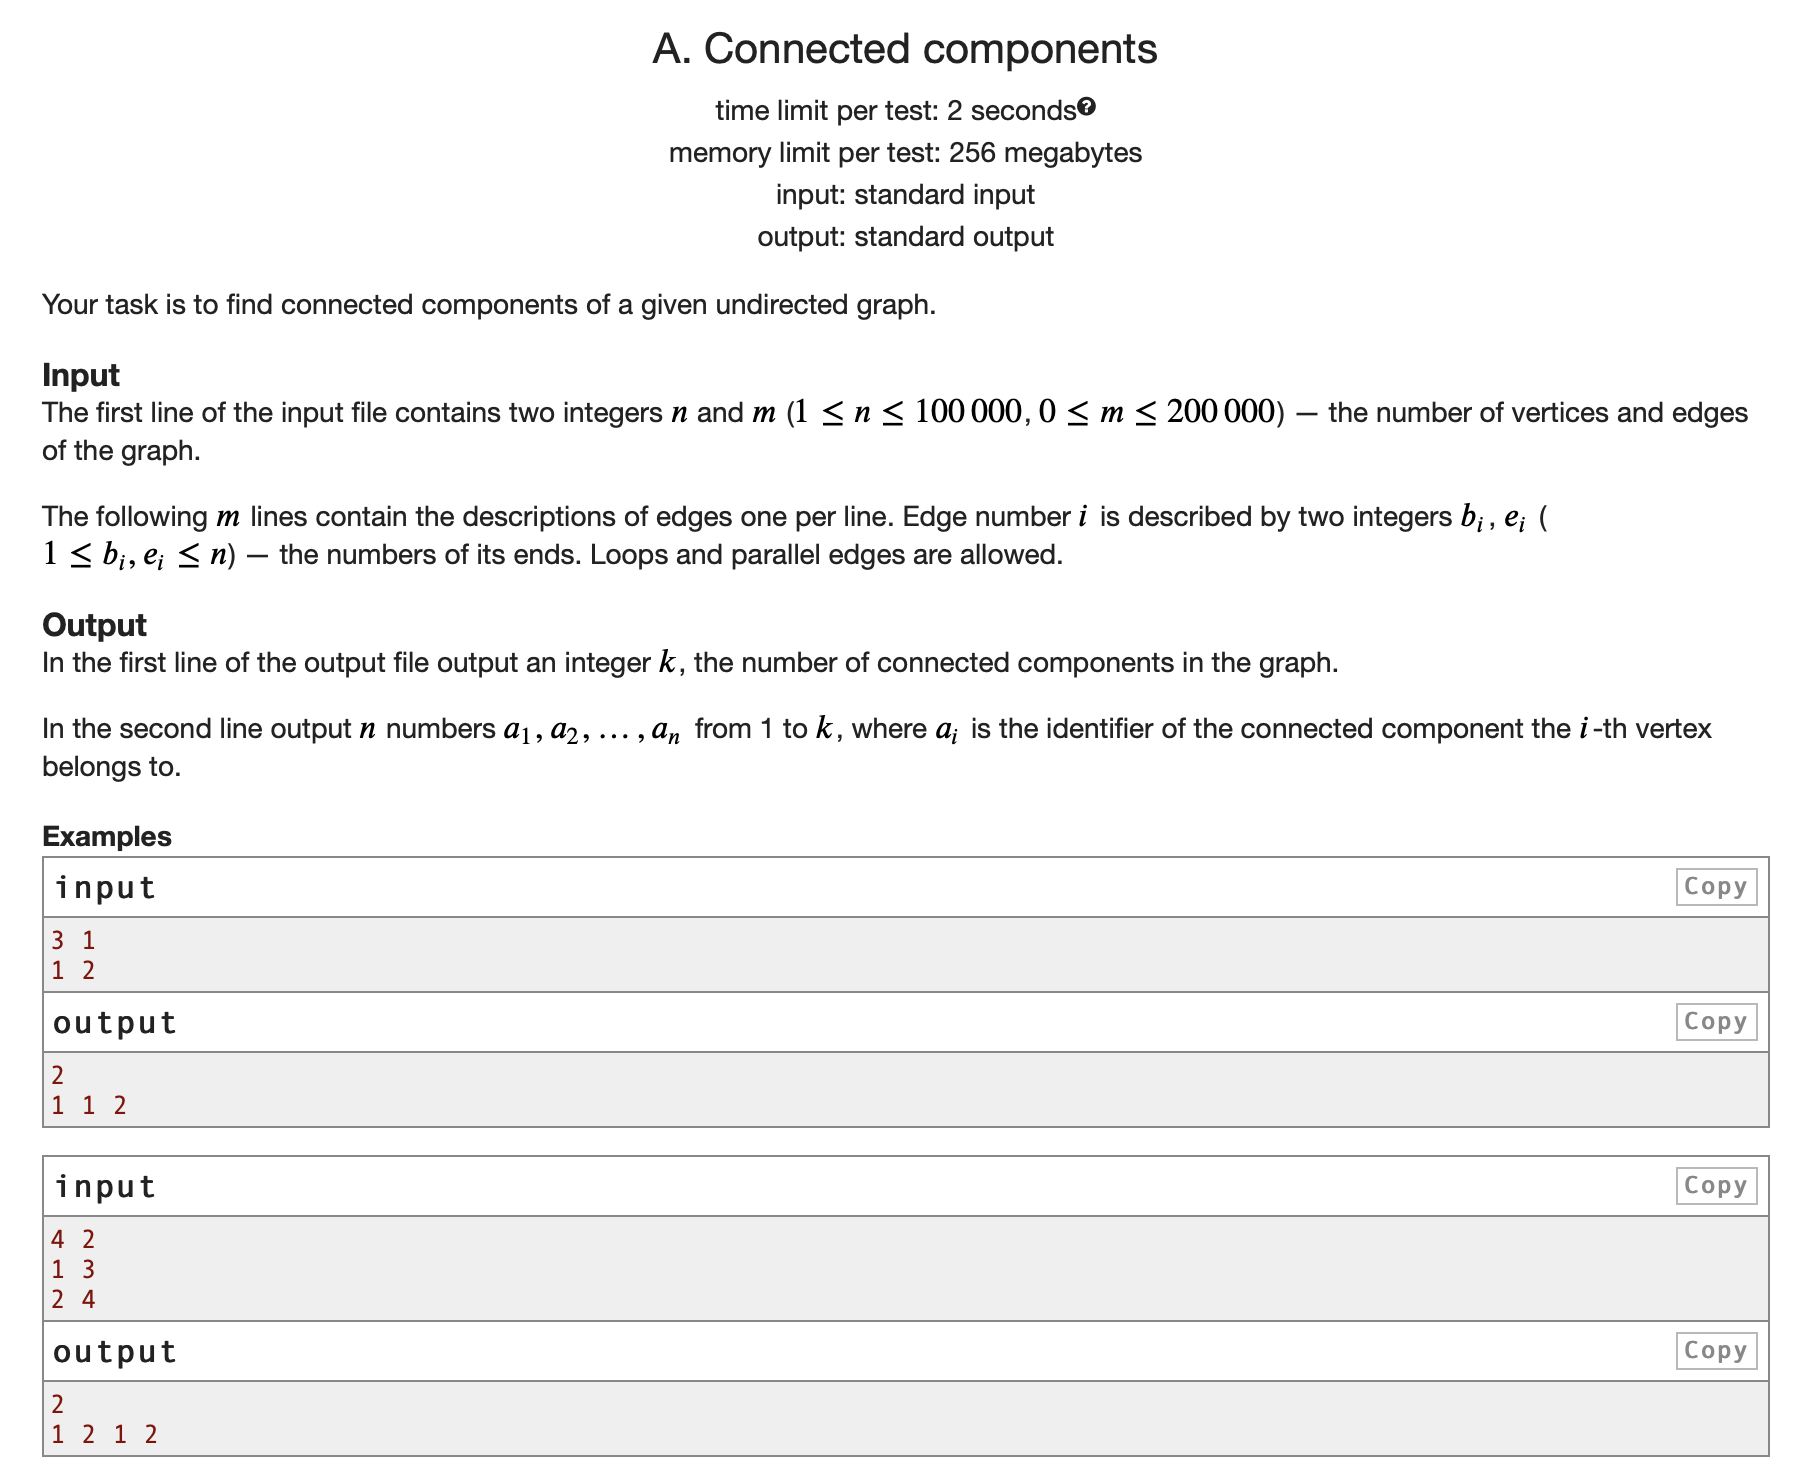

In [23]:
from sys import setrecursionlimit
import threading

UNPAINTED_COLOR = 0


def init_adjacency_list(V_num, E_num):
    adjacency_list = [[] for _ in range(V_num)]
    for _ in range(E_num):
        V_1, V_2 = list(map(lambda x: int(x) - 1, input().split()))
        adjacency_list[V_1].append(V_2)
        adjacency_list[V_2].append(V_1)
    return adjacency_list


def dfs(vertex, adjacency_list, colors, cur_color):
    colors[vertex] = cur_color
    for adjacent_vertex in adjacency_list[vertex]:
        if colors[adjacent_vertex] == UNPAINTED_COLOR:
            dfs(adjacent_vertex, adjacency_list, colors, cur_color)


def main():
    V_num, E_num = list(map(int, input().split()))
    adjacency_list = init_adjacency_list(V_num, E_num)
    colors = [UNPAINTED_COLOR] * V_num
    components_cnt = 0
    for vertex in range(V_num):
        if colors[vertex] == UNPAINTED_COLOR:
            components_cnt += 1
            dfs(vertex, adjacency_list, colors, components_cnt)
    print(components_cnt)
    print(*colors)


setrecursionlimit(10 ** 9)
threading.stack_size(2 ** 26)
thread = threading.Thread(target=main)
thread.start()

3 1
1 2
2
1 1 2


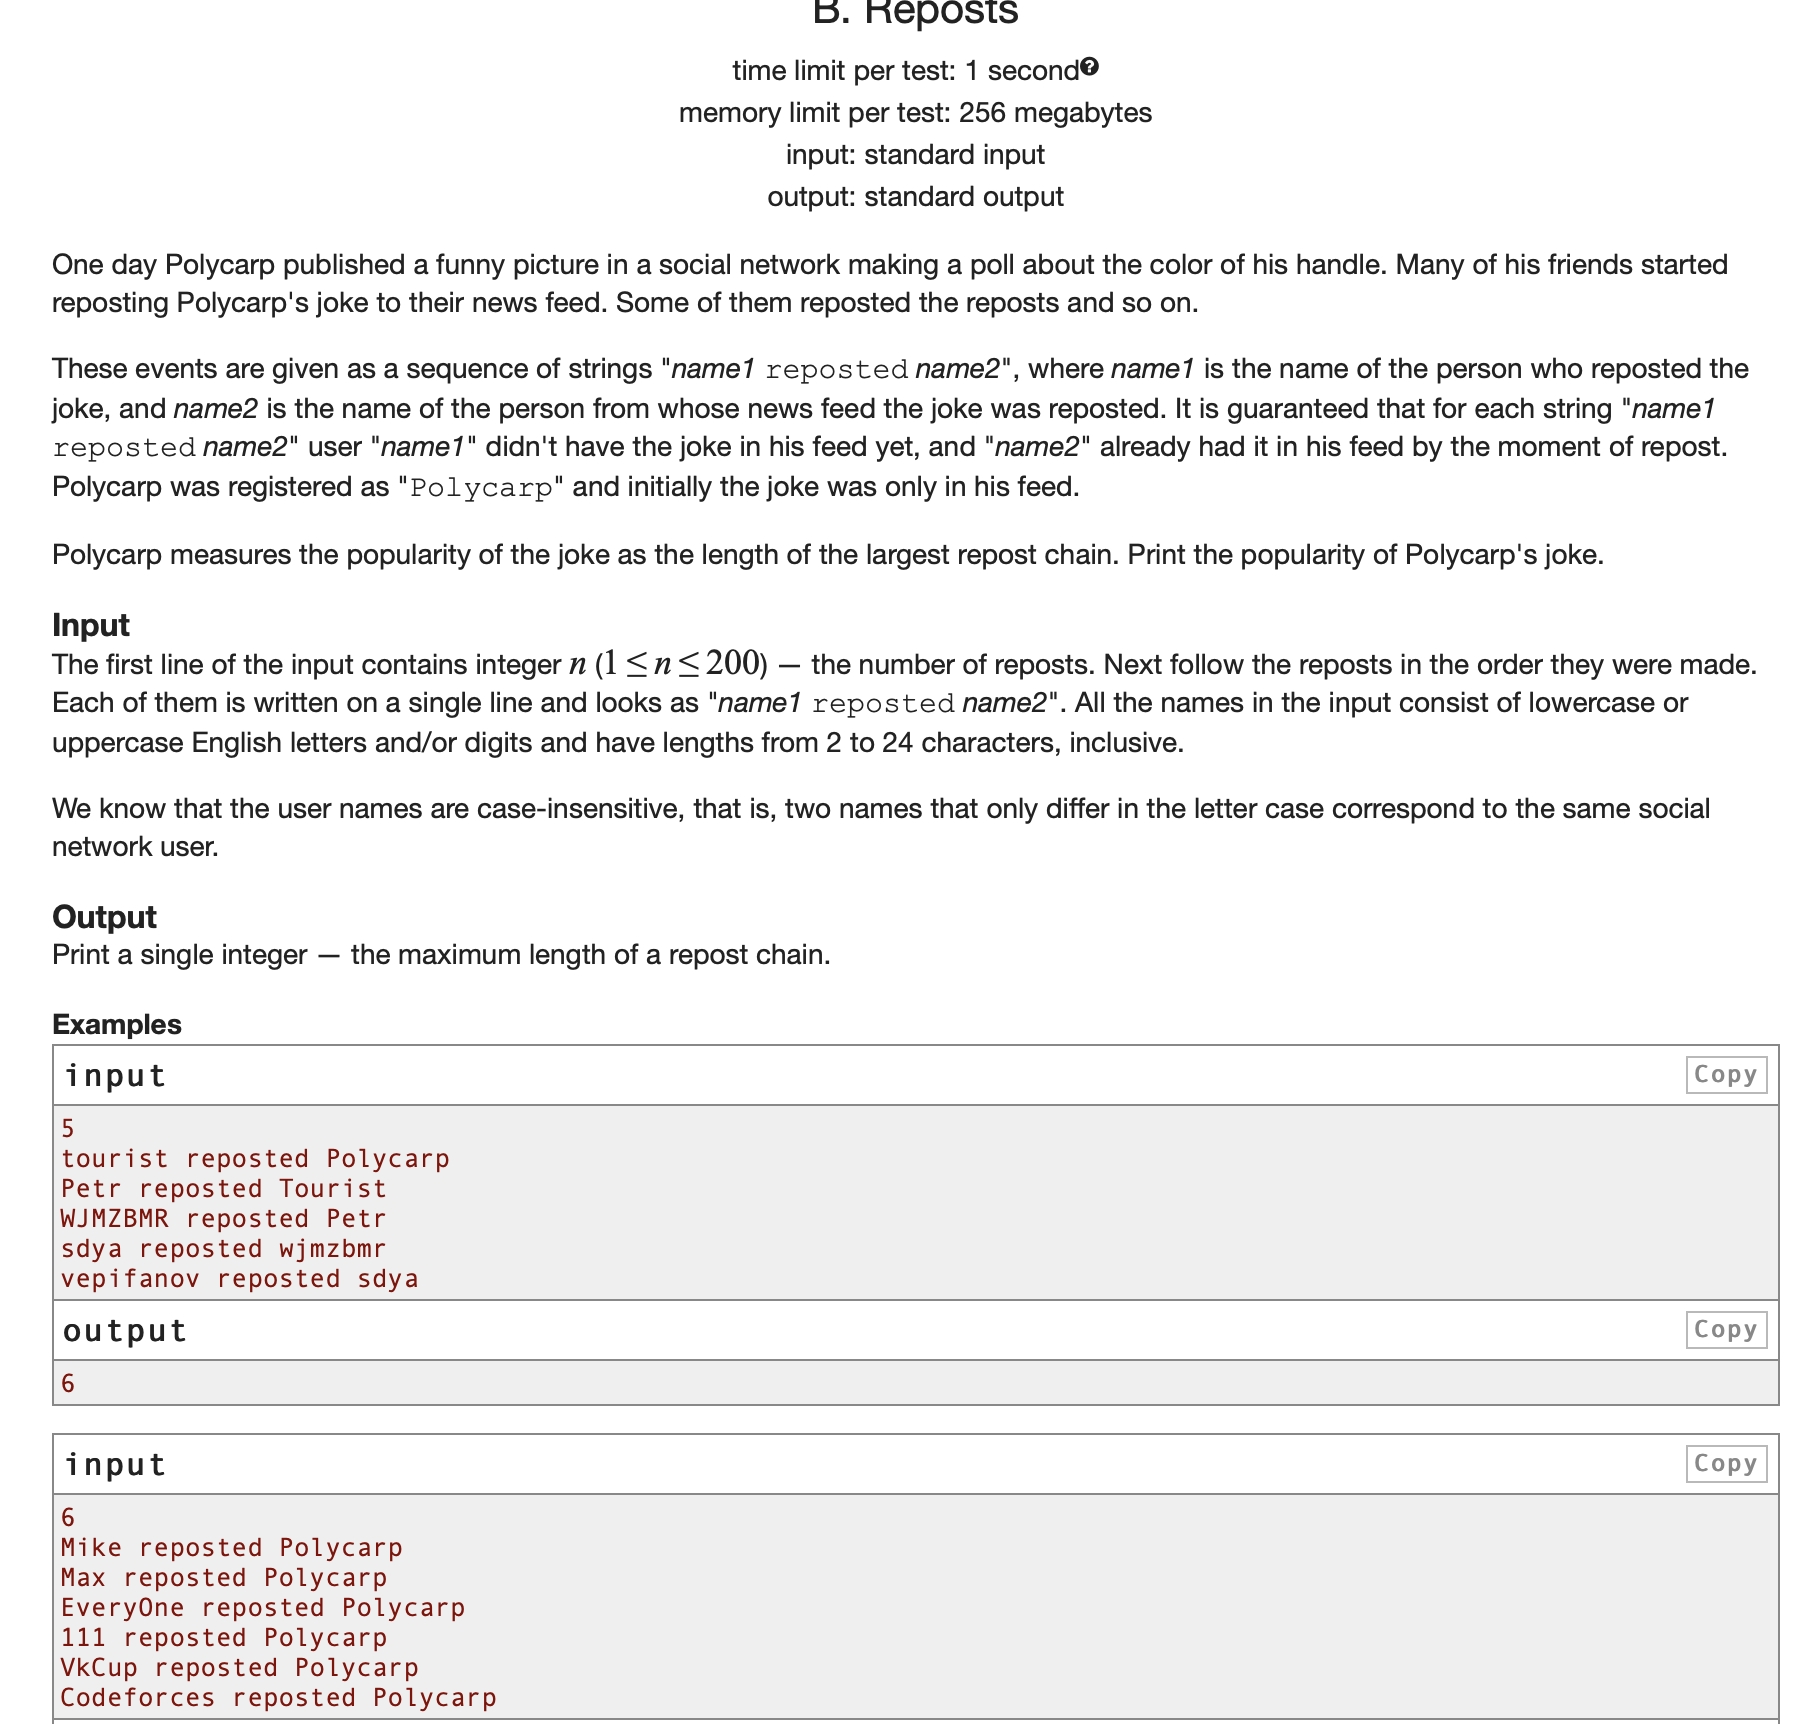
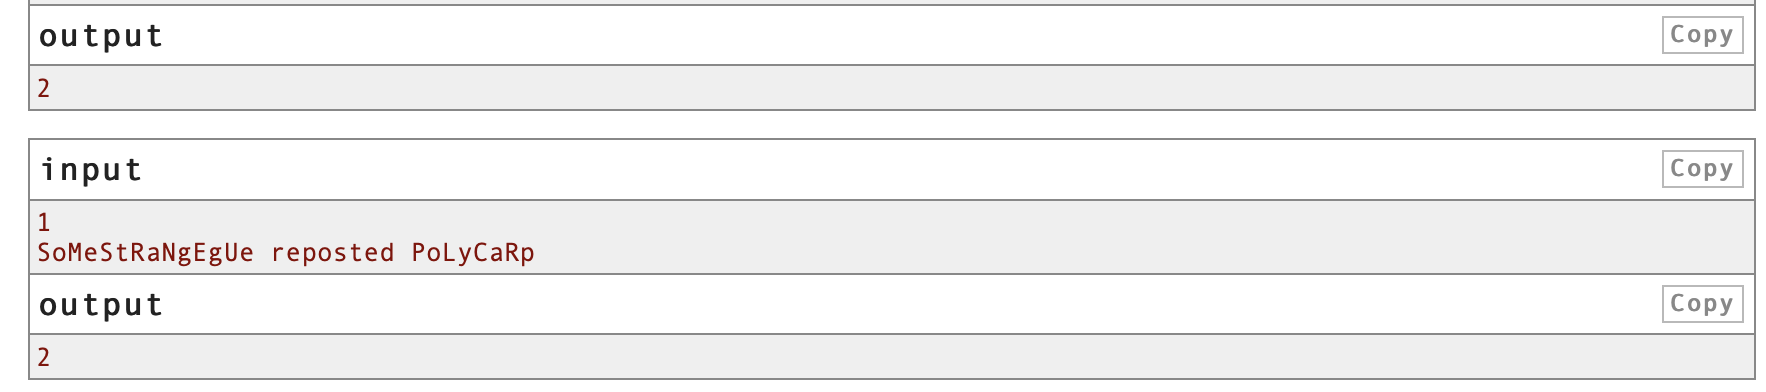

In [36]:
from sys import setrecursionlimit
import threading
from collections import defaultdict


def init_adjacency_list(n):
    adjacency_list = defaultdict(list)
    for _ in range(n):
        V_in, _, V_out = list(input().lower().split())
        adjacency_list[V_out].append(V_in)
        if V_in not in adjacency_list:
            adjacency_list[V_in] = []
    return adjacency_list


def dfs(vertex, vertices):
    vertices[vertex]['is_used'] = True
    for adjacent_vertex in vertices[vertex]['adjacency_list']:
        if not vertices[adjacent_vertex]['is_used']:
            dfs(adjacent_vertex, vertices)
        vertices[vertex]['length'] = max(vertices[vertex]['length'], vertices[adjacent_vertex]['length'] + 1)


def main():
    n = int(input())
    adjacency_list = init_adjacency_list(n)
    vertices = {
        vertex: {
            'length': 1,
            'is_used': False,
            'adjacency_list': adjacency_list[vertex],
        }
        for vertex in adjacency_list}
    
    for vertex in vertices:
        if not vertices[vertex]['is_used']:
            dfs(vertex, vertices)

    max_length = 1
    for vertex in vertices:
        if vertices[vertex]['length'] > max_length:
            max_length = vertices[vertex]['length']

    print(max_length)


setrecursionlimit(10 ** 9)
threading.stack_size(2 ** 26)
thread = threading.Thread(target=main)
thread.start()

1
SoMeStRaNgEgUe reposted PoLyCaRp
2


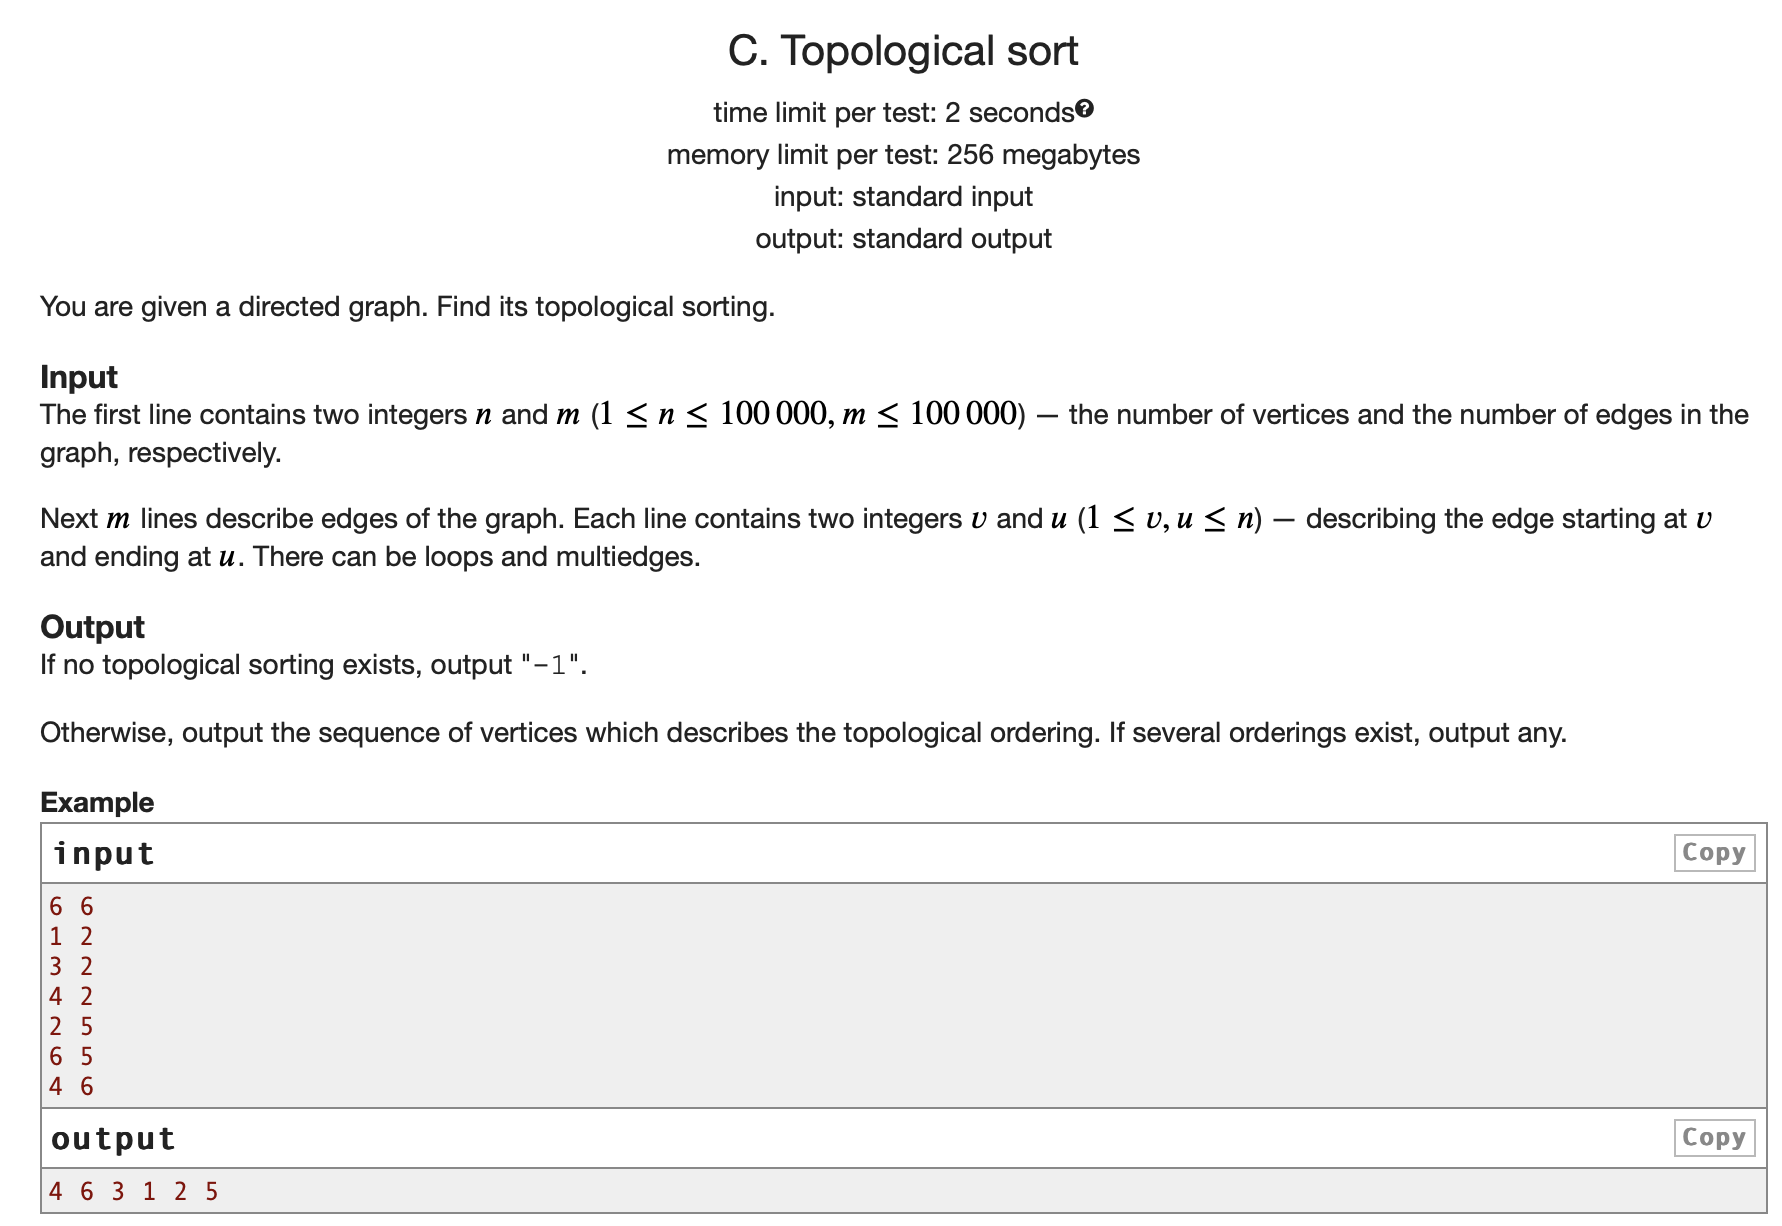

In [42]:
from sys import setrecursionlimit
import threading

UNPAINTED_COLOR = 0
CURRENT_SEARCH_COLOR = 1
FINISHED_SEARCH_COLOR = 2


def init_adjacency_list(V_num, E_num):
    adjacency_list = [[] for _ in range(V_num)]
    for _ in range(E_num):
        V_out, V_in = list(map(lambda x: int(x) - 1, input().split()))
        adjacency_list[V_out].append(V_in)
    return adjacency_list


def dfs(vertex, adjacency_list, colors, timeout_order):
    colors[vertex] = CURRENT_SEARCH_COLOR
    for adjacent_vertex in adjacency_list[vertex]:
        if colors[adjacent_vertex] == UNPAINTED_COLOR:
            dfs(adjacent_vertex, adjacency_list, colors, timeout_order)
        if colors[adjacent_vertex] == CURRENT_SEARCH_COLOR:
            return True
    colors[vertex] = FINISHED_SEARCH_COLOR
    timeout_order.append(vertex + 1)
    return False


def main():
    V_num, E_num = list(map(int, input().split()))
    adjacency_list = init_adjacency_list(V_num, E_num)
    colors = [UNPAINTED_COLOR] * V_num
    is_circle = False
    timeout_order = []
    for vertex in range(V_num):
        if colors[vertex] == UNPAINTED_COLOR:
            if dfs(vertex, adjacency_list, colors, timeout_order):
                is_circle = True
                break

    if is_circle:
        print(-1)
    else:
        print(*timeout_order[::-1])


setrecursionlimit(10 ** 9)
threading.stack_size(2 ** 26)
thread = threading.Thread(target=main)
thread.start()

6 6
1 2
3 2
4 2
2 5
6 5
4 6
4 6 3 1 2 5


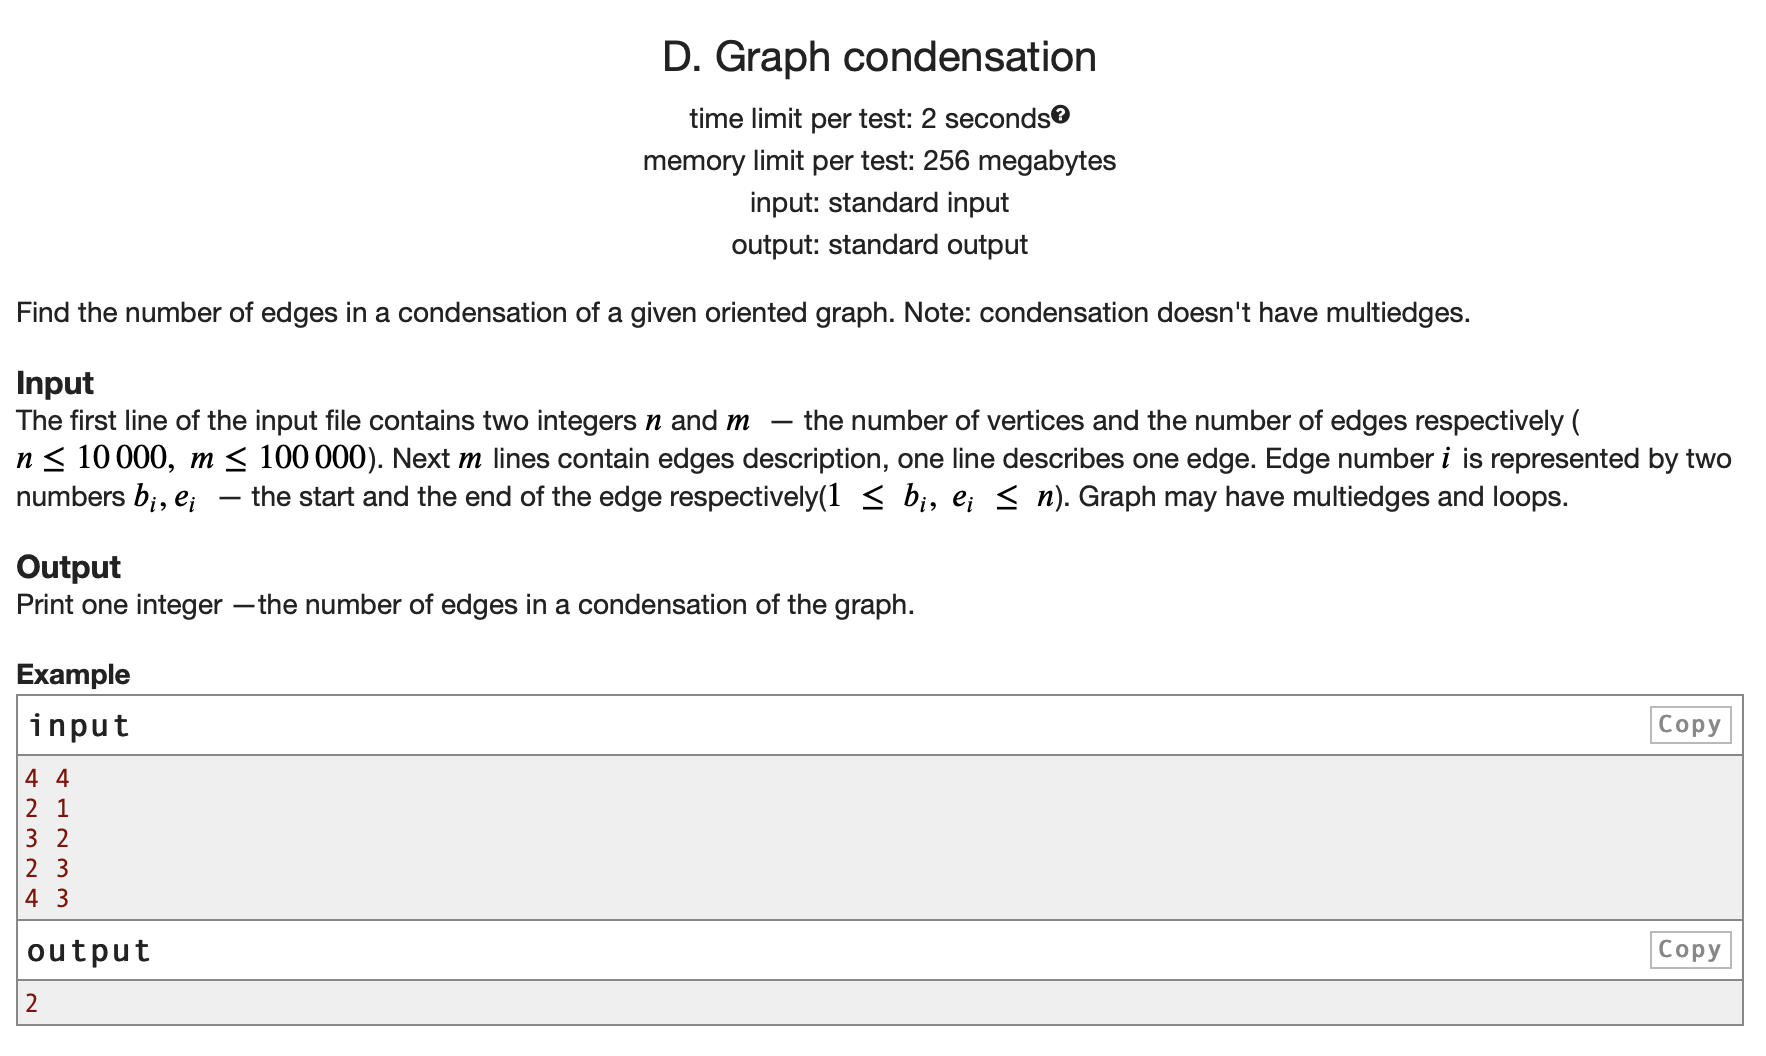

In [21]:
from sys import setrecursionlimit
import threading

UNPAINTED_COLOR = 0
CURRENT_SEARCH_COLOR = 1
FINISHED_SEARCH_COLOR = 2


def get_direct_and_reversed_graph(V_num, E_num):
    direct_adjacency_list = [[] for _ in range(V_num)]
    reversed_adjacency_list = [[] for _ in range(V_num)]
    for _ in range(E_num):
        V_out, V_in = list(map(lambda x: int(x) - 1, input().split()))
        direct_adjacency_list[V_out].append(V_in)
        reversed_adjacency_list[V_in].append(V_out)
    return direct_adjacency_list, reversed_adjacency_list


def dfs_topological_sort(vertex, adjacency_list, colors, timeout_order):
    colors[vertex] = CURRENT_SEARCH_COLOR
    for adjacent_vertex in adjacency_list[vertex]:
        if colors[adjacent_vertex] == UNPAINTED_COLOR:
            dfs_topological_sort(adjacent_vertex, adjacency_list, colors, timeout_order)
    colors[vertex] = FINISHED_SEARCH_COLOR
    timeout_order.append(vertex)


def dfs_connected_components(vertex, adjacency_list, colors, cur_color):
    colors[vertex] = cur_color
    for adjacent_vertex in adjacency_list[vertex]:
        if colors[adjacent_vertex] == UNPAINTED_COLOR:
            dfs_connected_components(adjacent_vertex, adjacency_list, colors, cur_color)


def get_edges_in_condensation_g(adjacency_list, colors):
    edges = set()
    for vertex in range(len(adjacency_list)):
        for adjacent_vertex in adjacency_list[vertex]:
            if colors[vertex] != colors[adjacent_vertex]:
                edges.add((colors[vertex], colors[adjacent_vertex]))
    return len(edges)


def main():
    V_num, E_num = list(map(int, input().split()))
    direct_adjacency_list, reversed_adjacency_list = get_direct_and_reversed_graph(V_num, E_num)
    colors_direct = [UNPAINTED_COLOR] * V_num
    timeout_order = []
    for vertex in range(V_num):
        if colors_direct[vertex] == UNPAINTED_COLOR:
            dfs_topological_sort(vertex, direct_adjacency_list, colors_direct, timeout_order)

    components_cnt = 0
    colors_reversed = [UNPAINTED_COLOR] * V_num
    for vertex in timeout_order[::-1]:
        if colors_reversed[vertex] == UNPAINTED_COLOR:
            components_cnt += 1
            dfs_connected_components(vertex, reversed_adjacency_list, colors_reversed, components_cnt)

    edges_cnt = get_edges_in_condensation_g(direct_adjacency_list, colors_reversed)
    print(edges_cnt)
    

setrecursionlimit(10 ** 9)
threading.stack_size(2 ** 26)
thread = threading.Thread(target=main)
thread.start()

4 4
2 1
3 2
2 3
4 3
2


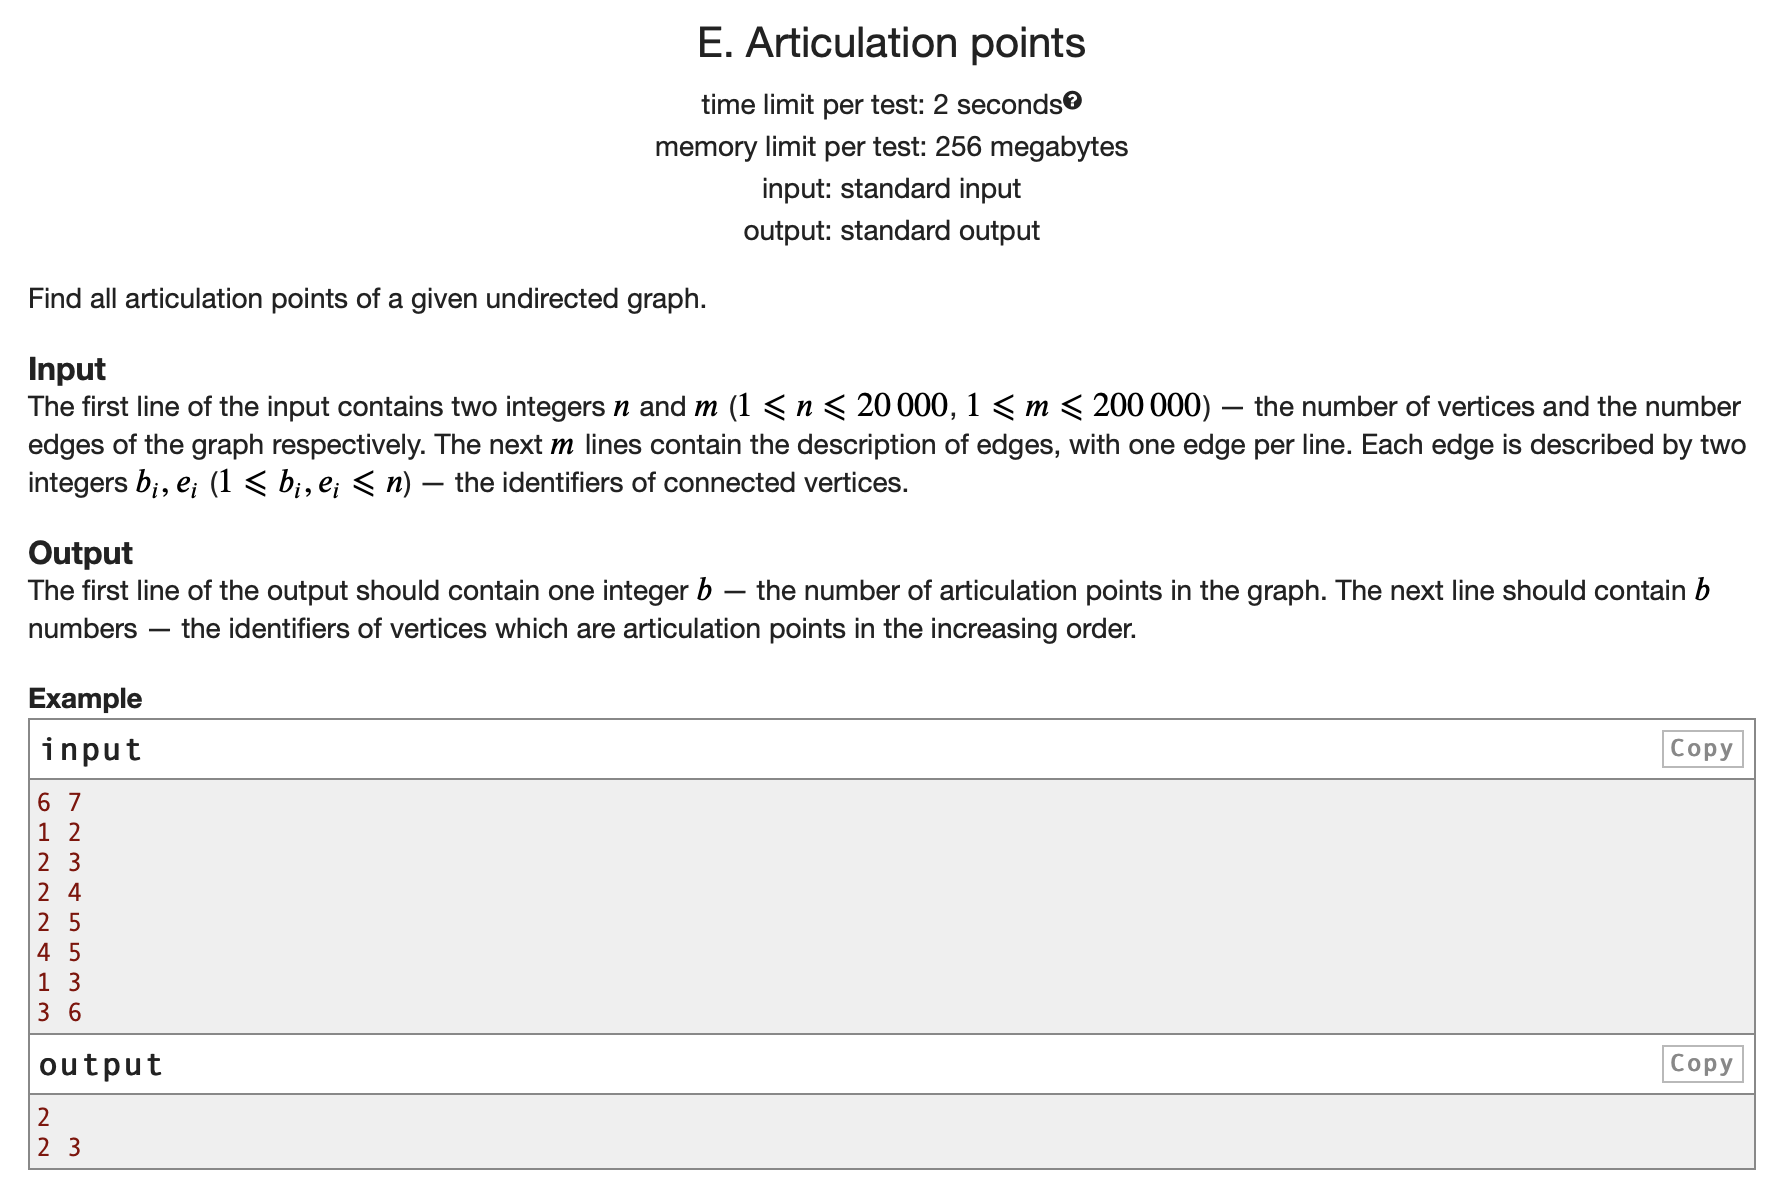

In [121]:
from sys import setrecursionlimit
import threading
from dataclasses import dataclass, field

UNPAINTED_COLOR = 0


@dataclass
class Vertex:
    vertex_num: int
    tin: int = 0
    up: int = 0
    is_used: bool = False
    is_articulation_point: bool = False
    adjacency_list: list = field(default_factory=list)


def get_graph(V_num, E_num):
    graph = [Vertex(i) for i in range(1, V_num + 1)]
    for _ in range(E_num):
        V_1, V_2 = list(map(lambda x: int(x) - 1, input().split()))
        graph[V_1].adjacency_list.append(graph[V_2])
        graph[V_2].adjacency_list.append(graph[V_1])
    return graph


def dfs(vertex, parent_vertex, tin, articulation_points):
    tin += 1
    vertex.tin = tin
    vertex.up = tin
    vertex.is_used = True
    children_num = 0
    for adjacent_vertex in vertex.adjacency_list:
        if not adjacent_vertex.is_used:
            dfs(adjacent_vertex, vertex, tin, articulation_points)
            vertex.up = min(vertex.up, adjacent_vertex.up)
            if (adjacent_vertex.up >= vertex.tin and parent_vertex is not None 
                    and not vertex.is_articulation_point):
                articulation_points.append(vertex.vertex_num)
                vertex.is_articulation_point = True
            children_num += 1
        else:
            vertex.up = min(vertex.up, adjacent_vertex.tin)
 
    if parent_vertex is None and children_num >= 2:
        articulation_points.append(vertex.vertex_num)


def main():
    V_num, E_num = list(map(int, input().split()))
    graph = get_graph(V_num, E_num)
    tin = 0
    articulation_points = []
    for vertex in graph:
        if not vertex.is_used:
            dfs(vertex, None, tin, articulation_points)
    
    print(len(articulation_points))
    print(*sorted(articulation_points))


setrecursionlimit(10 ** 9)
threading.stack_size(2 ** 26)
thread = threading.Thread(target=main)
thread.start()

6 7
1 2
2 3
2 4
2 5
4 5
1 3
3 6
2
2 3
